# Titanic Kaggle Competition

##### The Titanic challenge on Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.


The main libraries involved in this tutorial are:

Pandas for data manipulation
Matplotlib and seaborn for data visualization
Numpy for multidimensional array computing
sklearn for machine learning and predictive modeling
Installation procedure
A very easy way to install these packages is to download and install the Conda distribution that encapsulates them all. This distribution is available on all platforms (Windows, Linux and Mac OSX).




Data extraction : we'll load the dataset and have a first look at it.

Cleaning : we'll fill in missing values.

Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.

Assumptions : we'll formulate hypotheses from the charts.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load DataSets

In [6]:
train = pd.read_csv('http://bit.ly/kaggletrain')
test= pd.read_csv('http://bit.ly/kaggletest')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(train.shape)
print(test.shape)
 #for the ease of train and test dataest's column similarities

(891, 12)
(418, 11)


###### The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.

The other variables that describe the passengers are:

PassengerId: and id given to each traveler on the boat

Pclass: the passenger class. It has three possible values: 1,2,3

The Name

The Sex

The Age

SibSp: number of siblings and spouses traveling with the passenger

Parch: number of parents and children traveling with the passenger

The ticket number

The ticket Fare

The cabin number

The embarkation. It has three possible values S,C,Q

# Smart Visualization

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lines, Miss. Mary Conover",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


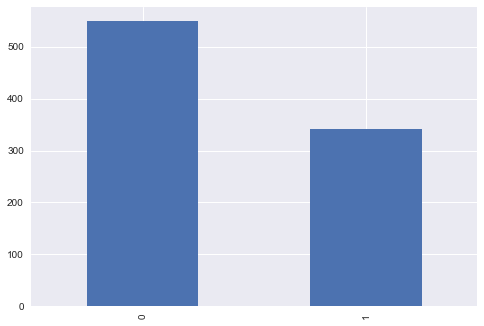

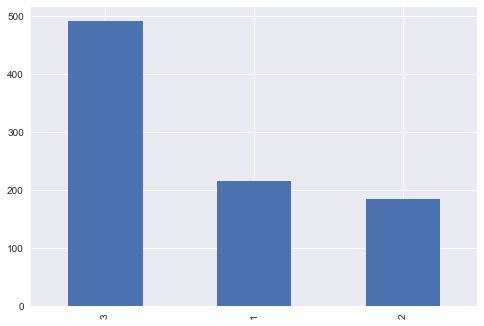

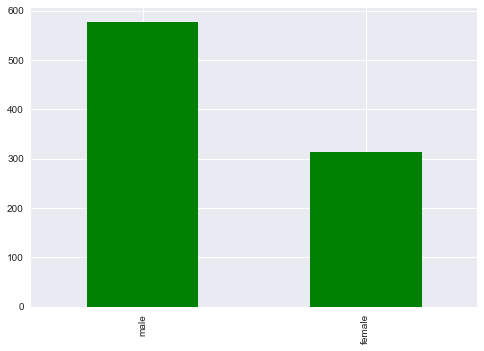

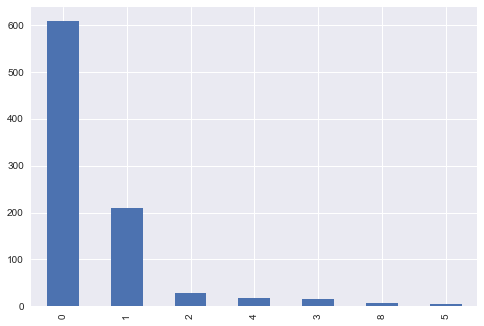

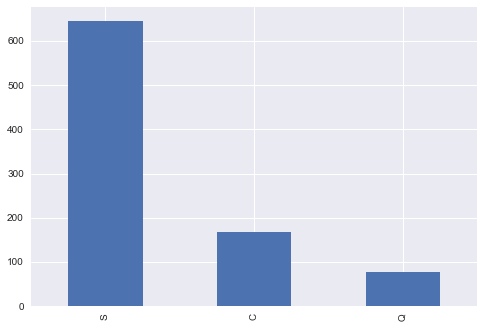

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Categorical Variable Analysis
train['Survived'].value_counts().plot.bar()
plt.show()
train['Pclass'].value_counts().plot.bar()
plt.show()
train['Sex'].value_counts().plot.bar(color='g')
plt.show()
train['SibSp'].value_counts().plot.bar()
plt.show()
train['Embarked'].value_counts().plot.bar()
plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


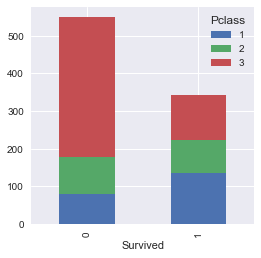

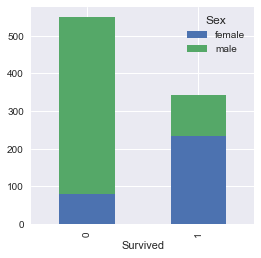

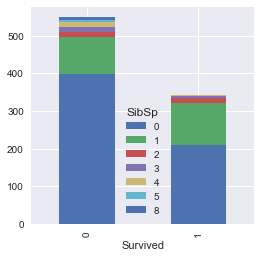

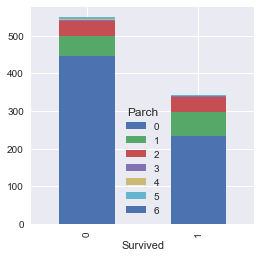

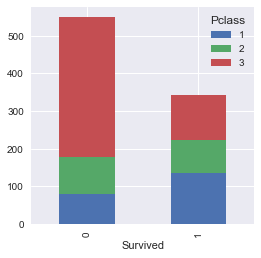

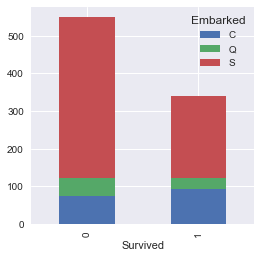

In [11]:
freq_1=pd.crosstab(index=train['Survived'],columns=train['Pclass'])
freq_2=pd.crosstab(index=train['Survived'],columns=train['Sex'])
freq_3=pd.crosstab(index=train['Survived'],columns=train['SibSp'])
freq_4=pd.crosstab(index=train['Survived'],columns=train['Parch'])
freq_5=pd.crosstab(index=train['Survived'],columns=train['Pclass'])
freq_6=pd.crosstab(index=train['Survived'],columns=train['Embarked'])
l=[freq_1,freq_2,freq_3,freq_4,freq_5,freq_6]
for i in l:
    print(i)
    
for i in l:
    i.plot(kind='bar',stacked=True,figsize=(4,4))
    # freq_1.plot.bar()
    plt.show()

# Making X and y

In [12]:
X = train
y = train["Survived"]

X.drop("Survived", axis=1, inplace=True)

X = pd.concat([X,test])
print(X.shape)
print(test.shape)
X.head()

(1309, 11)
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fillna and dropping

In [13]:
X.Age.fillna(X.Age.mean(),inplace=True)
X.drop('PassengerId', axis=1, inplace=True)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X.Cabin.fillna("N",inplace=True)
X.Embarked.fillna("N",inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       1309 non-null object
Embarked    1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [15]:

X['FamilySize'] = X ['SibSp'] + X['Parch'] + 1

X['IsAlone'] = 1 #initialize to yes/1 is alone
X['IsAlone'].loc[X['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

X['Title'] = X['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

F:\anaconda_setup\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
X.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,Mr


In [18]:
X.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

### Dummies

In [19]:
X = pd.get_dummies(X, columns=['Sex', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'Title', 'Pclass'], drop_first=True)

In [20]:
X.Fare.fillna(X.Fare.median(), inplace = True)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 47 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
IsAlone               1309 non-null int64
Sex_male              1309 non-null uint8
SibSp_1               1309 non-null uint8
SibSp_2               1309 non-null uint8
SibSp_3               1309 non-null uint8
SibSp_4               1309 non-null uint8
SibSp_5               1309 non-null uint8
SibSp_8               1309 non-null uint8
Parch_1               1309 non-null uint8
Parch_2               1309 non-null uint8
Parch_3               1309 non-null uint8
Parch_4               1309 non-null uint8
Parch_5               1309 non-null uint8
Parch_6               1309 non-null uint8
Parch_9               1309 non-null uint8
Embarked_N            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
FamilySize_2          1309 non-null uint8
FamilySi

In [22]:
X.head()

,Age,Fare,IsAlone,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Pclass_2,Pclass_3
0,22.0,7.2500,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,38.0,71.2833,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# separating total dataset into train and test

In [23]:
X_final = X.iloc[891:]

In [24]:
X_final.head()

,Age,Fare,IsAlone,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Pclass_2,Pclass_3
0,34.5,7.8292,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,47.0,7.0000,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,62.0,9.6875,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,8.6625,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
X_train = X.iloc[:891]

In [26]:
X_train.head()

,Age,Fare,IsAlone,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Pclass_2,Pclass_3
0,22.0,7.2500,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,38.0,71.2833,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
X = X_train

In [28]:
X.shape

(891, 47)

# Machine Learning Algorithms

### Libraries

In [29]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure visualizations
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 8

In [31]:
    from sklearn.neural_network import MLPClassifier
    
    
    
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import BaggingClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import RandomForestClassifier

    #Gaussian Processes
    from sklearn.gaussian_process import GaussianProcessClassifier
    
    #GLM
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.linear_model import RidgeClassifierCV
    from sklearn.linear_model import SGDClassifier
    from sklearn.linear_model import Perceptron
    
    #Navies Bayes
    from sklearn.naive_bayes import GaussianNB
    
    #Nearest Neighbor
    from sklearn.neighbors import KNeighborsClassifier
    
    #SVM
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    
    #Trees    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import ExtraTreeClassifier
    
models_name = [AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(n_estimators = 100),
    GaussianProcessClassifier(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 3),
    SVC(probability=True),
    LinearSVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ]


for model in models_name:
        
        cv_results = model_selection.cross_val_score(model, X, y, cv  = 10, scoring = 'accuracy')
        print(cv_results.mean()*100)
        print(model,cv_results.mean()*100)
        

81.038247645
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 81.038247645
82.0457382817
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False) 82.0457382817
78.2341675179
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) 78.2341675179
82.3840369992
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_le

In [135]:
# Select the best model and predict 

### Evalutation techniques

## model.score

In [ ]:
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

## accuracy_score

In [52]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.84328358209


## Cross_val_score

In [66]:
cv_results = model_selection.cross_val_score(alg, X_train, y_train, cv  = 10, scoring = 'accuracy')
cv_results.mean()

0.78486063108038906

### testing

In [32]:
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
cv_results = model_selection.cross_val_score(model, X, y, cv  = 10, scoring = 'accuracy')
cv_results.mean()*100

82.607507660878454

In [33]:
depth = [1,2,3,4,5,6,7,8,9,10]


for value in depth:
    model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=value,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
    cv_results = model_selection.cross_val_score(model, X, y, cv  = 10, scoring = 'accuracy')
    print(value, '......',cv_results.mean()*100)

1 ...... 80.6924015435
2 ...... 82.6075360345
3 ...... 82.4963965498
4 ...... 84.1793496765
5 ...... 83.3953864488
6 ...... 82.0470150948
7 ...... 82.3802916809
8 ...... 81.2591930541
9 ...... 81.0369708319
10 ...... 80.3641187152


In [34]:
min_sam = [1,2,3,4,5,6,7,8,9,10]


for value in min_sam:
    model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=value,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
    cv_results = model_selection.cross_val_score(model, X, y, cv  = 10, scoring = 'accuracy')
    print(value, '......',cv_results.mean()*100)

1 ...... 84.1793496765
2 ...... 83.2804165248
3 ...... 84.6300646919
4 ...... 83.1693621609
5 ...... 84.2980365452
6 ...... 83.6225740552
7 ...... 84.0682669391
8 ...... 83.3966065146
9 ...... 83.8435478379
10 ...... 83.9571842016


In [40]:

model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
cv_results = model_selection.cross_val_score(model, X, y, cv  = 10, scoring = 'accuracy')
print(value, '......',cv_results.mean()*100)

10 ...... 84.4040687777


# test set

In [41]:
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [42]:
new_pred_class = model.predict(X_final)

In [43]:
new_pred_class

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [44]:
# PassengerID is the first column by setting it as the index
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [45]:
# DataFrame to a CSV file that can be submitted to Kaggle
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').to_csv('titanic_sub_autoML.csv')